In [1]:
# ! pip install --upgrade pip setuptools wheel
# ! pip install pandas 
# ! pip install numpy tensorflow
# ! pip install split-folders
# !pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16


In [2]:
# Splitting Dataset
# import splitfolders
# input_dir = "dataset"
# output_dir = "data_dir"

# splitfolders.ratio(input_dir, output_dir, seed=1337, ratio=(.6,.4), group_prefix=None)

In [3]:
train_dir = "data_dir/train"
valid_dir = "data_dir/val"
img_width, img_height = 224, 224  # Default input size for VGG16

# Instantiate convolutional base
model_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

# Show architecture
model_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# Extract features
# !pip install Pillow

import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,6))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = model_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
#         print(batch_size, sample_count)
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 188)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(valid_dir, 127)

Found 188 images belonging to 6 classes.
Found 127 images belonging to 6 classes.


In [5]:
train_labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [6]:
train_features

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 7.46202946e-01, 0.00000000e+00],
         [8.86271372e-02, 0.00000000e+00, 5.62852740e-01, ...,
          0.00000000e+00, 5.10355592e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 6.93798840e-01, ...,
          0.00000000e+00, 3.26088309e-01, 0.00000000e+00],
         ...,
         [3.29461873e-01, 0.00000000e+00, 1.50449038e-01, ...,
          0.00000000e+00, 5.85411787e-01, 0.00000000e+00],
         [3.00395012e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 8.86848152e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 4.12547380e-01, ...,
          0.00000000e+00, 8.18692923e-01, 0.00000000e+00]],

        [[1.06447518e-01, 0.00000000e+00, 6.60316050e-01, ...,
          0.00000000e+00, 4.06941414e-01, 0.00000000e+00],
         [5.63836396e-02, 0.00000000e+00, 1.16794801e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        

In [7]:
validation_labels

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [8]:
validation_features

array([[[[2.02459246e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 6.82064354e-01, 0.00000000e+00],
         [2.30374068e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 4.26215559e-01, 0.00000000e+00],
         [7.88521767e-02, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 4.60624754e-01, 0.00000000e+00],
         ...,
         [7.82220960e-02, 0.00000000e+00, 5.08031547e-02, ...,
          0.00000000e+00, 5.65969348e-01, 0.00000000e+00],
         [5.84129393e-02, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 4.61410195e-01, 0.00000000e+00],
         [1.55266151e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 5.44280589e-01, 0.00000000e+00]],

        [[2.27505654e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 9.90129292e-01, 0.00000000e+00],
         [3.47389102e-01, 0.00000000e+00, 2.59528875e-01, ...,
          0.00000000e+00, 5.57562709e-01, 0.00000000e+00],
        

In [9]:
epochs = 150

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 3,078
Trainable params: 3,078
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

# Compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

Epoch 1/150
6/6 [==============================] - 5s 297ms/step - loss: 1.8354 - acc: 0.2181 - val_loss: 1.7575 - val_acc: 0.2520

Epoch 00001: val_loss improved from inf to 1.75753, saving model to model-001-0.218085-0.251969.h5
Epoch 2/150
6/6 [==============================] - 0s 18ms/step - loss: 1.7311 - acc: 0.2872 - val_loss: 1.6923 - val_acc: 0.3071

Epoch 00002: val_loss improved from 1.75753 to 1.69234, saving model to model-002-0.287234-0.307087.h5
Epoch 3/150
6/6 [==============================] - 0s 14ms/step - loss: 1.6716 - acc: 0.3032 - val_loss: 1.6490 - val_acc: 0.3622

Epoch 00003: val_loss improved from 1.69234 to 1.64899, saving model to model-003-0.303191-0.362205.h5
Epoch 4/150
6/6 [==============================] - 0s 15ms/step - loss: 1.6281 - acc: 0.3670 - val_loss: 1.6084 - val_acc: 0.4409

Epoch 00004: val_loss improved from 1.64899 to 1.60836, saving model to model-004-0.367021-0.440945.h5
Epoch 5/150
6/6 [==============================] - 0s 16ms/step - l

6/6 [==============================] - 0s 16ms/step - loss: 0.7684 - acc: 0.8989 - val_loss: 0.8015 - val_acc: 0.9055

Epoch 00036: val_loss improved from 0.81435 to 0.80151, saving model to model-036-0.898936-0.905512.h5
Epoch 37/150
6/6 [==============================] - 0s 16ms/step - loss: 0.7529 - acc: 0.9043 - val_loss: 0.7886 - val_acc: 0.8976

Epoch 00037: val_loss improved from 0.80151 to 0.78859, saving model to model-037-0.904255-0.897638.h5
Epoch 38/150
6/6 [==============================] - 0s 16ms/step - loss: 0.7390 - acc: 0.9149 - val_loss: 0.7760 - val_acc: 0.8976

Epoch 00038: val_loss improved from 0.78859 to 0.77605, saving model to model-038-0.914894-0.897638.h5
Epoch 39/150
6/6 [==============================] - 0s 15ms/step - loss: 0.7257 - acc: 0.9096 - val_loss: 0.7641 - val_acc: 0.8976

Epoch 00039: val_loss improved from 0.77605 to 0.76407, saving model to model-039-0.909574-0.897638.h5
Epoch 40/150
6/6 [==============================] - 0s 17ms/step - loss: 

Epoch 71/150
6/6 [==============================] - 0s 17ms/step - loss: 0.4530 - acc: 0.9521 - val_loss: 0.5242 - val_acc: 0.9213

Epoch 00071: val_loss improved from 0.52894 to 0.52419, saving model to model-071-0.952128-0.921260.h5
Epoch 72/150
6/6 [==============================] - 0s 19ms/step - loss: 0.4475 - acc: 0.9521 - val_loss: 0.5200 - val_acc: 0.9213

Epoch 00072: val_loss improved from 0.52419 to 0.52000, saving model to model-072-0.952128-0.921260.h5
Epoch 73/150
6/6 [==============================] - 0s 16ms/step - loss: 0.4421 - acc: 0.9574 - val_loss: 0.5160 - val_acc: 0.9134

Epoch 00073: val_loss improved from 0.52000 to 0.51597, saving model to model-073-0.957447-0.913386.h5
Epoch 74/150
6/6 [==============================] - 0s 17ms/step - loss: 0.4372 - acc: 0.9521 - val_loss: 0.5115 - val_acc: 0.9055

Epoch 00074: val_loss improved from 0.51597 to 0.51151, saving model to model-074-0.952128-0.905512.h5
Epoch 75/150
6/6 [==============================] - 0s 18ms/

6/6 [==============================] - 0s 15ms/step - loss: 0.3114 - acc: 0.9894 - val_loss: 0.4090 - val_acc: 0.9213

Epoch 00106: val_loss improved from 0.41124 to 0.40900, saving model to model-106-0.989362-0.921260.h5
Epoch 107/150
6/6 [==============================] - 0s 15ms/step - loss: 0.3082 - acc: 0.9894 - val_loss: 0.4072 - val_acc: 0.9213

Epoch 00107: val_loss improved from 0.40900 to 0.40724, saving model to model-107-0.989362-0.921260.h5
Epoch 108/150
6/6 [==============================] - 0s 15ms/step - loss: 0.3058 - acc: 0.9894 - val_loss: 0.4052 - val_acc: 0.9213

Epoch 00108: val_loss improved from 0.40724 to 0.40521, saving model to model-108-0.989362-0.921260.h5
Epoch 109/150
6/6 [==============================] - 0s 15ms/step - loss: 0.3024 - acc: 0.9894 - val_loss: 0.4027 - val_acc: 0.9213

Epoch 00109: val_loss improved from 0.40521 to 0.40273, saving model to model-109-0.989362-0.921260.h5
Epoch 110/150
6/6 [==============================] - 0s 15ms/step - lo

Epoch 141/150
6/6 [==============================] - 0s 14ms/step - loss: 0.2292 - acc: 0.9894 - val_loss: 0.3468 - val_acc: 0.9370

Epoch 00141: val_loss improved from 0.34870 to 0.34681, saving model to model-141-0.989362-0.937008.h5
Epoch 142/150
6/6 [==============================] - 0s 15ms/step - loss: 0.2274 - acc: 0.9894 - val_loss: 0.3451 - val_acc: 0.9291

Epoch 00142: val_loss improved from 0.34681 to 0.34510, saving model to model-142-0.989362-0.929134.h5
Epoch 143/150
6/6 [==============================] - 0s 13ms/step - loss: 0.2259 - acc: 0.9894 - val_loss: 0.3443 - val_acc: 0.9291

Epoch 00143: val_loss improved from 0.34510 to 0.34428, saving model to model-143-0.989362-0.929134.h5
Epoch 144/150
6/6 [==============================] - 0s 14ms/step - loss: 0.2240 - acc: 0.9894 - val_loss: 0.3431 - val_acc: 0.9134

Epoch 00144: val_loss improved from 0.34428 to 0.34309, saving model to model-144-0.989362-0.913386.h5
Epoch 145/150
6/6 [==============================] - 0s 

In [11]:
# !pip install matplotlib
# Plot results
import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc)+1)

# plt.plot(epochs, acc, 'g', label='Training accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'g', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [12]:
from keras.preprocessing import image
def prediction(img_path):
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()


    # Extract features
    features = model_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = model.predict(features)
    except:
        prediction = model.predict(features.reshape(1, 7*7*512))
        
    classes = ["ant", "budhha", "dolphin", "elephant", "flamingo", "rooster"]
    print("This Image is of a... "+str(classes[np.argmax(np.array(prediction[0]))]))

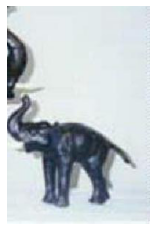

This Image is of a... flamingo


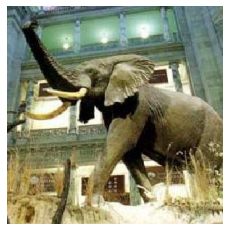

This Image is of a... elephant


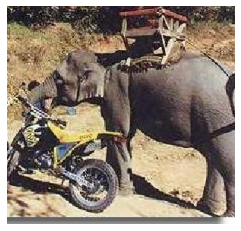

This Image is of a... elephant


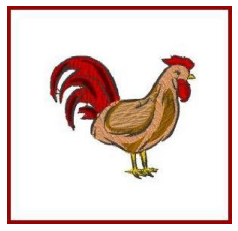

This Image is of a... rooster


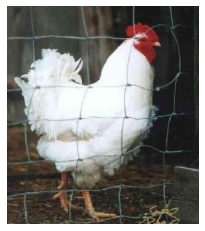

This Image is of a... elephant


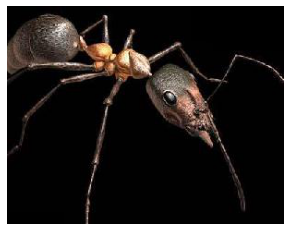

This Image is of a... ant


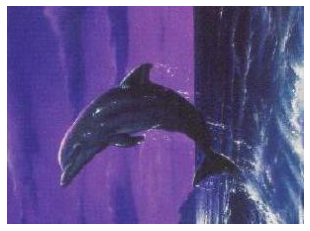

This Image is of a... dolphin


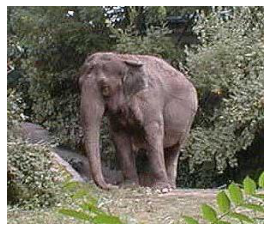

This Image is of a... elephant


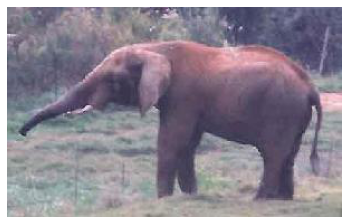

This Image is of a... elephant


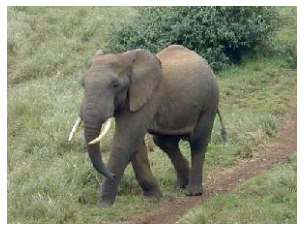

This Image is of a... elephant


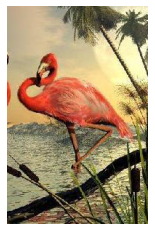

This Image is of a... flamingo


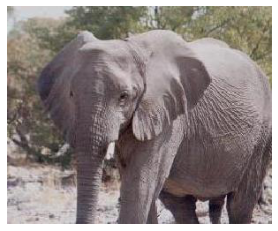

This Image is of a... elephant


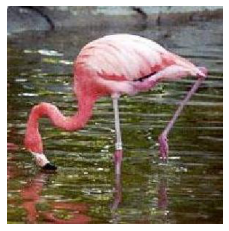

This Image is of a... flamingo


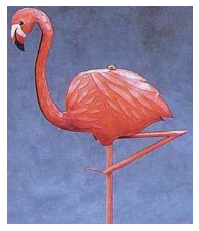

This Image is of a... flamingo


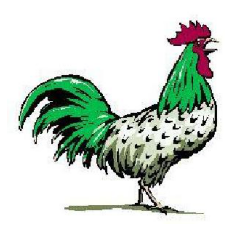

This Image is of a... rooster


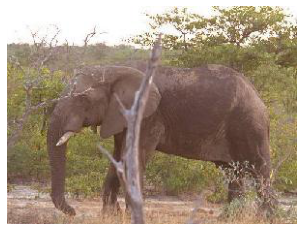

This Image is of a... elephant


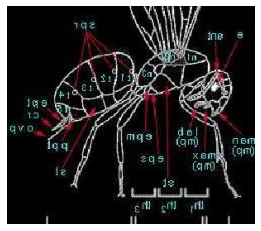

This Image is of a... ant


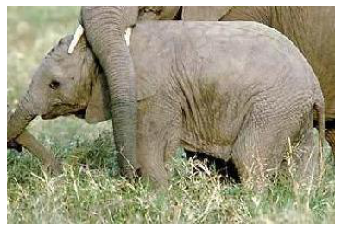

This Image is of a... elephant


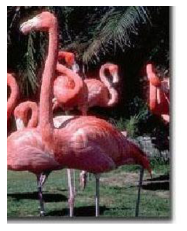

This Image is of a... flamingo


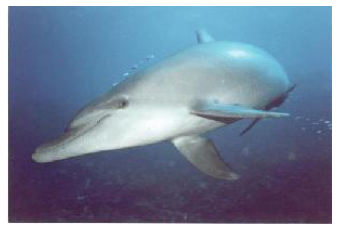

This Image is of a... dolphin


In [13]:
import random

pred_dir = []
for d in os.listdir("dataset/"):
    for f in os.listdir("dataset/"+str(d)):
        pred_dir.append(str(d)+"/"+f)
pred_files = random.sample(pred_dir,20)
for f in pred_files:
    prediction("dataset/"+f)